In [1]:
 # Initial imports
import pandas as pd
from pathlib import Path

In [2]:
# Data loading
file_path = Path("crypto_data.csv")
df_crypto = pd.read_csv(file_path)
df_crypto.count()

Unnamed: 0         1252
CoinName           1252
Algorithm          1252
IsTrading          1252
ProofType          1252
TotalCoinsMined     744
TotalCoinSupply    1252
dtype: int64

In [3]:
df_crypto = df_crypto[df_crypto.IsTrading != False]
df_crypto.count()

Unnamed: 0         1144
CoinName           1144
Algorithm          1144
IsTrading          1144
ProofType          1144
TotalCoinsMined     685
TotalCoinSupply    1144
dtype: int64

In [4]:
df_crypto = df_crypto.dropna()
df_crypto.count()

Unnamed: 0         685
CoinName           685
Algorithm          685
IsTrading          685
ProofType          685
TotalCoinsMined    685
TotalCoinSupply    685
dtype: int64

In [5]:
df_crypto = df_crypto[df_crypto.TotalCoinsMined > 0]
df_crypto.count()

Unnamed: 0         532
CoinName           532
Algorithm          532
IsTrading          532
ProofType          532
TotalCoinsMined    532
TotalCoinSupply    532
dtype: int64

In [6]:
df_crypto.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0


In [7]:
df_crypto_trimmed=df_crypto.drop(columns=['Unnamed: 0', 'CoinName','IsTrading'])
df_crypto_trimmed.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [8]:
df_crypto_clean = pd.get_dummies(df_crypto_trimmed, columns=['Algorithm','ProofType'])
df_crypto_clean.drop
df_crypto_clean.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_crypto_clean)

In [10]:
scaled_data

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [11]:
print(scaled_data[0:3])

[[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.07530656 -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963
  -0.19245009 -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656
  -0.0433963  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963
  -0.0433963  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.06142951 -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963
  -0.13118084 -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963
  -0.07530656 -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.15826614 -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951
   1.38675049 -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.39879994 -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883
  -0.10680283 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.07530656 -0.43911856 -0.04339

In [12]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [13]:
# Initialize PCA model
pca = PCA(n_components=0.90)

# Get two principal components for the data.
crypto_pca = pca.fit_transform(scaled_data)

In [14]:
print(crypto_pca[0:3])

[[-3.35098808e-01  1.03218907e+00 -5.90713438e-01  1.39712021e-03
   8.90352515e-15  3.71556696e-12 -1.71618862e-14 -7.12909178e-03
  -1.31975584e+00 -5.18126297e-02 -3.33924586e-01  1.63297817e-01
   1.89800622e-01 -4.68650471e-01  9.78620138e-01  1.47488016e-01
   1.34198542e-01  1.27648437e-01  1.18400989e-02  1.93433049e-02
  -2.57628210e-02 -2.51823458e-03 -2.14905340e-03  3.88228754e-03
   2.29300373e-02 -7.72139891e-03  1.22886019e-03 -5.44715795e-04
   1.65516553e-15 -5.92696748e-15 -7.21678784e-06  1.03135581e-03
  -1.76289739e-03  4.79108267e-03 -1.48202268e-04  2.05774516e-03
   1.00262616e-02  2.29426126e-04 -1.10577664e-03 -5.60929095e-04
  -3.02537602e-15 -1.38250078e-15 -8.31814580e-04  1.95056849e-03
   1.85690012e-03 -1.76684615e-03  5.87140621e-03 -4.69114275e-04
   5.77791000e-15  1.05858939e-15 -9.08770421e-15 -1.30896345e-15
   8.79890179e-15 -1.31416807e-15  6.96541341e-15 -9.85626753e-16
  -2.19851248e-17 -9.20307555e-16  2.19241860e-15  5.12642527e-16
   2.49586

The PCA took the columns down from 98 to 74.

In [15]:
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(crypto_pca)

In [16]:
transformed_features.shape

(532, 2)

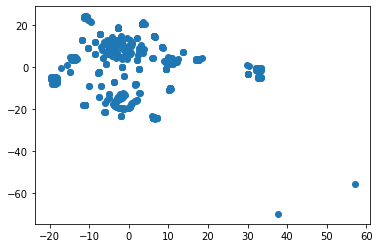

In [17]:
 # Plot the results
import matplotlib.pyplot as plt
plt.scatter(transformed_features[:,0], transformed_features[:,1])
plt.show()

In [18]:
labels = df_crypto.TotalCoinsMined

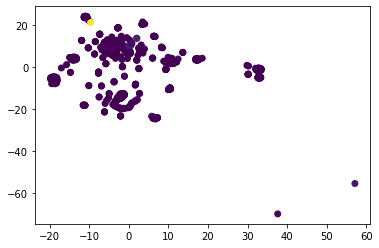

In [19]:
plt.scatter(transformed_features[:,0], transformed_features[:,1], c=labels)
plt.show()

In [20]:
from sklearn.cluster import KMeans
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(transformed_features)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\kehar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,181604.015625
1,2,111344.734375
2,3,61124.054688
3,4,43288.503906
4,5,30927.816406


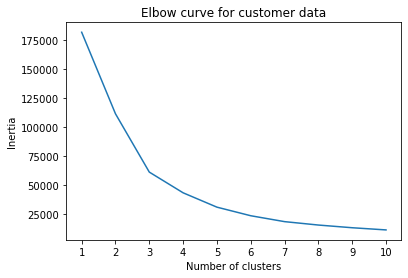

In [21]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

According to the Elbow Curve, I would recommend 4 or 5 clusters.  But to have a more confident recommendation, I would suggest we need more data, maybe reviewing different time periods to observe the coin's performance would help produce recommendations.   